In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(os.path.join(module_path, 'scripts'))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [3]:
utils.set_project_dir()

In [4]:
test_size = 0.5

In [5]:
# Directory for figures
fig_dir = 'ml/figures/rf_performance'

FixedFormatter should only be used together with FixedLocator


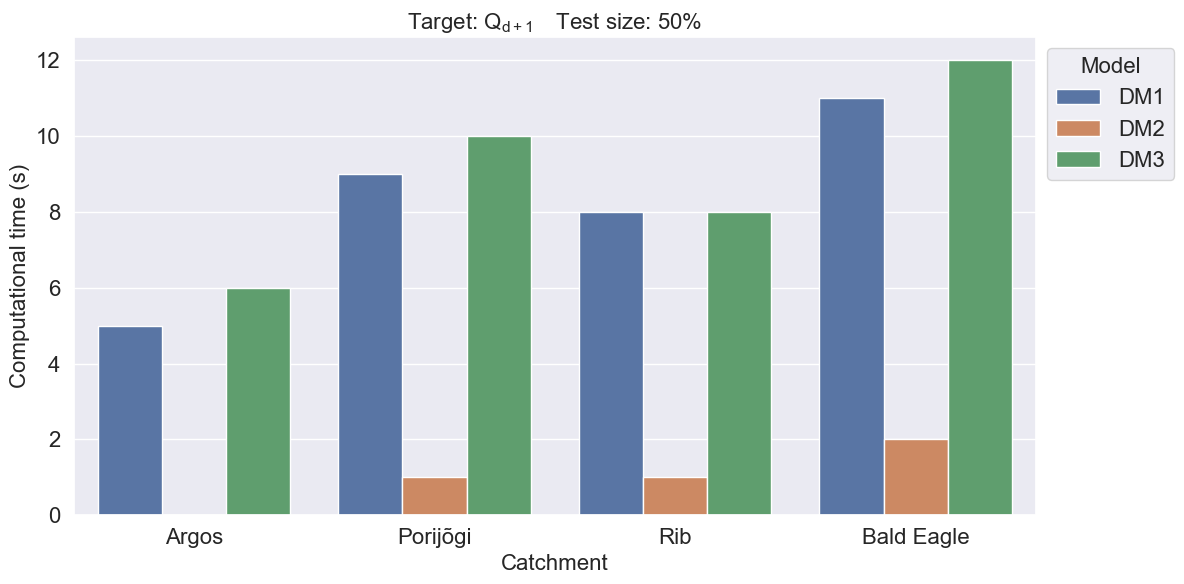

In [6]:
fontsize = 16
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
time_interval = 'd'
target = f'Q_{time_interval}+1'
results_df = utils.concat_rf_metrics(time_interval)
results_df = results_df.sort_values(["country_code", "feat_set"])
sns.barplot(y='training_time_seconds', x='catchment_name', data=results_df, hue='feat_set', ax=ax)
legend_handles, legend_labels = ax.get_legend_handles_labels()
legend_labels = [
    utils.get_model_name(feat_set) for feat_set in results_df['feat_set'].unique()
]
plt.legend(
    handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1, 1), loc=2, title='Model', title_fontsize=fontsize, 
    fontsize=fontsize
)
plt.title(
    'Target: ' + f"$\mathregular{{{target.split('_')[0]}}}_\mathregular{{{target.split('_')[1]}}}$" +
    '$\quad$' +
    f'Test size: {int(test_size * 100)}%',
    fontsize=fontsize
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
ax.set_xlabel('Catchment', fontsize=fontsize)
ax.set_ylabel('Computational time (s)', fontsize=fontsize)
fig.tight_layout()
test_size_int = int(test_size * 100)
plt.savefig(f'{fig_dir}/{target}_rf_training_time_{test_size_int}.png', dpi=300)